# Week 7 Data Modeling - Linear Models & Generalized Linear Models

Week 7 reading: **Pandas for Everyone** chapters 12 - 13 (pages 243 - 264)

Outline:

* Chapter 12 - Linear Models
    1. Visualization - matplotlib and seaborn
    2. What does "Linear Model" really mean?

* Chapter 13 - Generalized Linear Models
    1. Things
    
## Overview

Up to this point, we have looked at data wrangling as an end unto itself, used simply to get the data into a better form or format for visual inspection and then left it there. But, generally we are doing data wrangling with the end-goal of creating some type of analytic or predictive model, often using the **sklearn** library (although many other libraries also exist for modeling purposes).

This week we will first look at some visualization methods using the **matplotlib** and **seaborn** libraries and then discuss the most common type of model, the **linear regression**, along with some graphing to add depth to the discussion in **Pandas for Everyone**.

## 1. Visualization - matplotlib and seaborn

The subject of visualization in data science is much too big for the space we have here but learning some basics will serve you well and help point the way to more advanced usage. 

### Matplotlib

The most "universal" data plotting library in Python is called `matplotlib`. It is a **very** powerful library with a ton of options and abilities but like most powerful software, it can be a tad bit confusing to use. I recommend looking at some of DataCamp's tutorials about matplotlib and definitely get their [matplotlib cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf).

Just like we use **pd** as an alias for Pandas and **np** as an alias for Numpy, the accepted alias for matplotlib is **plt**. 

### Magic

Jupyter notebooks have special commands called "magic" that perform special functions. Some very useful magics:

* %time
* %timeit
* %matplotlib inline

The first two are concerned with timing lines of code or entire cells but the third magic is the one we are most interested in. `%matplotlib inline` tells the jupyter notebook to show graphs on the notebook page.

Let's make a quick scatter plot:


In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# First, let's have 50 x-values
x = np.random.randint(low=0, high=1000,size=50)
x

array([ 63, 192, 780, 112, 223, 168, 411, 906, 771, 155, 408, 443, 774,
       957, 976, 975, 148, 479, 516, 755, 283, 938, 704, 136, 992, 405,
         6, 984, 702, 649,  37, 396, 321, 192, 211, 747, 939, 961, 971,
        61, 431, 955, 918, 474,  56, 425, 597, 980, 954,  74])

In [3]:
# Now, let's generate some y-values
y = 2 * x - 5 + np.random.randint(low=0, high=1000,size=50)
y

array([ 633,  442, 2525,  432,  675,  822, 1377, 1892, 1754, 1134,  876,
       1678, 1688, 2616, 2085, 2227, 1007, 1436, 1449, 2472, 1381, 2065,
       1811,  422, 2798, 1397,  174, 2639, 1882, 1626,  129,  879,  872,
        772, 1297, 2113, 2002, 2117, 2414,  195, 1489, 2626, 2497, 1415,
        131, 1144, 2108, 2694, 2477,  222])

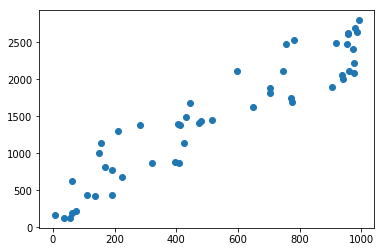

In [4]:
# And then a simple plot
plt.scatter(x,y);

That plot is OK but doesn't look that great, so let's bring in another plotting library -- just for formatting, now. We will do more with it in a bit.

In [5]:
import seaborn as sns
sns.set()

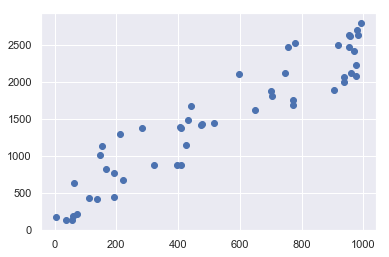

In [6]:
plt.scatter(x,y)

## Seaborn

The seaborn library is built on top of matplotlib and significantly simplifies creating more complex graphs. We will use seaborn to do some preliminary analysis on a "real" example data set in a few minutes. Just like `matplotlib` above, I encourage you to go get the [Datacamp Seaborn cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)

Seaborn is smart enough to get data out of a dataframe, provided you tell it which columns go on the axes. We will use the `zip()` function to create a list of tuples then make a dataframe.

In [17]:
import pandas as pd
data = list(zip(x,y))
df = pd.DataFrame(data,columns=['x','y'])
df.head()

,x,y
0,63,633
1,192,442
2,780,2525
3,112,432
4,223,675


Seaborn has a `scatterplot()` function and also a `relplot()` function that "relates" two variables. The `relplot()` default is to use a scatterplot:

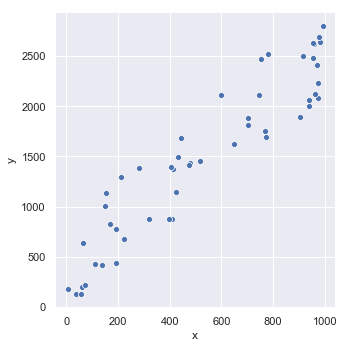

In [20]:
sns.relplot(x='x', y='y',data=df)

## 2. What does "Linear Model" really mean?

Before we go too far down the rabbit hole of visualization, let's take a moment and discuss *why* we are doing all this work.

First of all, why do I keep using this word, "model?" A model is a mathematical relationship between the observed features and the outcome. Ultimately, we want to be able to feed any set of unlabeled, unanalyzed feature data into our model and get an *accurate* prediction of the outcome.

Many times in classes or Kaggle competitions (you **do** know about Kaggle, right?), we analyze data, create graphs and build models as ends in themselves. However, many times, finding and refining the model is just the first step. If the model you've tuned is going to be used for **predictive analysis** in a production setting, it may have to be adapted for larger input data sizes or streaming data. You (or someone) will have to continue refining the model and doing ongoing maintenance to insure it stays accurate over in changing conditions. 

### What is this "linear" of which you speak?

Chapter 12 of **Pandas for Everyone** discusses linear models. Specifically, it starts out with the "ordinary least squares" algorithm of the `statsmodels` package, but doesn't provide much detail. 

As mentioned in the book, linear regression finds a straight line on the graph of features that best fits **all** the points. However, unless you have a *really* boring dataset, no straight line will match all of the points. The y-axis difference between the line and a point is called the **_residual_**. Perhaps a picture will help:

<figure>
    <img align="center" style="padding-right:10px;" src="figures/ISLR_Seventh_Printing_Linear_Reg_Residuals.png" width=400>
    <figcaption>Residuals as black vertical lines between each point and the regression line. (ISLR)</figcaption>
</figure>

The figure above shows the relationship between TV advertising and sales. As can be seen, most of the points do not fall on the regression line. Points above the line represent a positive number (the actual point is greater in the y-direction than predicted), and points below the line are negative. 

If you were to try to find some absolute measure of accuracy, the most obvious way would some calculation involving the summation of the errors (residuals). However, since the errors can be both positive and negative, it would not be accurate. Thus we square the residuals before summing, and in this way can get an absolute value for the error, called the Residual Sum of Squares (RSS). The *least squares* algorithm seeks to minimize RSS. 

<hr>

Whew! That was a lot of words. Let's do some calculatin'! 

Since the book adequately demonstrates linear regression from both `statsmodels` and `sklearn`, let's demonstrate seaborn's ability to calculate and plot a linear regression. It will even throw in confidence intervals for free!

<hr>

_Reference: James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning (Vol. 112). New York: springer._

In [23]:
# Suppress a deprecation warning...

import warnings
warnings.filterwarnings('ignore')

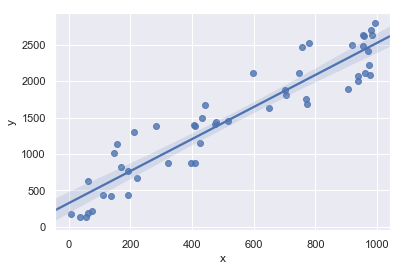

In [24]:
# Using our x and y from earlier.
# Seaborn has 2 ways to plot a regression: regplot and lmplot\

sns.regplot(x="x", y="y", data=df);

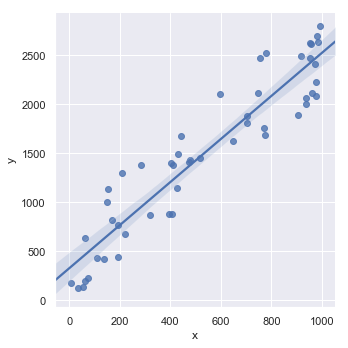

In [22]:
sns.lmplot(x="x", y="y", data=df);

As you can see, the plots are the same just a different shape.

Seaborn can even plot residuals for us:

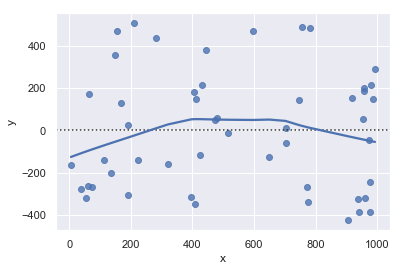

In [27]:
# lowess is a local regression line 
sns.residplot(x='x', y='y', lowess=True, data=df)

Points should be randomly distributed on the y-axis. If you see patterns then linear regression probably isn't appropriate.